# Linear Regression Assignment 4b:
## Ridge Regression Manual Algorithm (With or Without Intercept Penalty)

We will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.

The amount by which we move in the negative gradient direction is called the ‘step size’. We stop when we are ‘sufficiently close’ to the optimum. Unlike in Module 2, this time we will set a maximum number of iterations and take gradient steps until we reach this maximum number. If no maximum number is supplied, the maximum should be set 100 by default. (Use default parameter values in Python.)

With this in mind, write a gradient descent function using your derivative function above. For each step in the gradient descent, we update the weight for each feature before computing our stopping criteria. The function will take the following parameters:

2D feature matrix

array of output values

initial weights

step size

L2 penalty

maximum number of iterations

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int,
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float,
              'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int,
              'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
house_df=pd.read_csv("kc_house_data.csv",dtype=dtype_dict)
train_df=pd.read_csv("kc_house_train_data.csv",dtype=dtype_dict)
test_df=pd.read_csv("kc_house_test_data.csv",dtype=dtype_dict)

In [163]:
#Define a function that accepts a dataframe slice as feature values and returns a numpy array. The first column of the 
#matrix should be all ones (this is for the constant term). The function should also take, as input, a list of feature
#names. The output H matrix will have its columns in the same order they appear in the list.

def H_generator(x_data,col_list):
    #add the ones column
    data=x_data.copy()
    data["ones"]=1
    return np.array(data[["ones",]+col_list])

In [164]:
#Define a function that takes an H matrix, a y vector, the L2 penalty, and a w vector (initial values) and 
#outputs the gradient matrix. The gradient matrix outputted will depend on whether the intercept should be
#included in the w penalty, thus we have one more parameter "exclude_intercept" which should have bool values

def gradient_generator2(H,w,y,alpha,exclude_intercept):
    if exclude_intercept:
        imod=np.identity(len(w))
        imod[0,0]=0
        return_gradient=-2*np.dot(np.transpose(H),y-np.dot(H,w))+2*alpha*np.dot(imod,w)
    else:
        return_gradient=-2*np.dot(np.transpose(H),y-np.dot(H,w))+2*alpha*w
    return return_gradient

In [165]:
#Define a function called "regressor" that performs the gradient descent algorithm. As inputs, it should take an H matrix,
#an initial w vector called w_not, a y vector, step size eta, convergence criterium epsilon, max_iterations,
#and include_intercept, which has a default value of false. 
#It should return the final w vector once it has converged or reached the max_iterations

def regressor2(H,w_not,y,eta,epsilon,max_iterations,alpha,exclude_intercept=True):
    wn=w_not
    j=0
    while True:
        j+=1
        gradient=gradient_generator2(H,wn,y,alpha,exclude_intercept)
        gradient_length=np.sqrt(abs(np.dot(gradient,gradient)))
        wn=wn-(eta*gradient)
        if gradient_length<epsilon or j>max_iterations:
            break
    print("Coef: {}\ny predict: {}\niterations: {}\ngradient_length: {}".format(wn,np.dot(H,wn),j,gradient_length))
    return(wn,np.dot(H,wn))

In [166]:
#Define a residual sum of squares function:
def rss(y_true,y_prediction):
    return ((y_true-y_prediction)**2).sum()

In [167]:
#Define the model that makes predictions
def manual_predict(w,x_data,col_list):
    H=H_generator(x_data,col_list)
    return np.dot(H,w)

## Task 1

First, let’s consider no regularization. Set the L2 penalty to 0.0 and run your ridge regression algorithm to learn the weights of the simple model, that uses sqt_living as the x value and price as the y. Use the following parameters:

step_size = 1e-12

max_iterations = 1000

initial_weights = all zeros

In [168]:
X1_train=train_df[["sqft_living",]]
y1_train=train_df.price

In [169]:
w_not=np.array([0,0])

In [170]:
H1=H_generator(X1_train,["sqft_living",])

In [171]:
weights_and_y1=regressor2(H1,w_not,y1_train,1e-12,0.01,1000,0,exclude_intercept=True)

Coef: [ -1.63382329e-01   2.63024369e+02]
y predict: [ 310368.5921243   675972.46513634  202528.6008042  ...,  402427.12129999
  420838.82713513  268284.69307255]
iterations: 1001
gradient_length: 268814314.77064294


In [172]:
simple_weights_0_penalty=weights_and_y1[0]
ypredict1=weights_and_y1[1]

## Task 2

Next, let’s consider high regularization. Set the L2 penalty to 1e11 and run your ridge regression to learn the weights of the simple model. Use the same parameters as above. 

In [173]:
weights_and_y2=regressor2(H1,w_not,y1_train,1e-12,0.01,1000,1e11,exclude_intercept=True)

Coef: [   9.77704731  124.57217382]
y predict: [ 147004.94215446  320160.26376373   95930.35088842 ...,  190605.20299133
  199325.2551587   127073.39434332]
iterations: 1001
gradient_length: 9743490855.83395


In [174]:
simple_weights_high_penalty=weights_and_y2[0]
ypredict2=weights_and_y2[1]

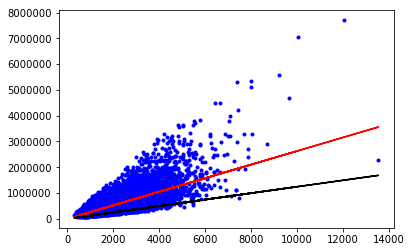

In [175]:
#graph
plt.figure()
plt.plot(train_df.sqft_living,y1_train,".",color="blue")
plt.plot(train_df.sqft_living,ypredict1,"-",color="red")
plt.plot(train_df.sqft_living,ypredict2,"-",color="black")

## Task 3
Compute the RSS on the TEST data for the following three sets of weights:

The initial weights (all zeros)

The weights learned with no regularization

The weights learned with high regularization

In [176]:
y_test=test_df.price

In [177]:
#Initial weights 0, rss
rss(y_test,pd.Series([0,]*len(y_test)))

1784273286136298.0

In [178]:
#No regularization
y1predict_test=manual_predict(simple_weights_0_penalty,test_df[["sqft_living",]],["sqft_living",])

In [179]:
rss(y_test,y1predict_test)

275723632143243.2

In [180]:
#High Regularization
y2predict_test=manual_predict(simple_weights_high_penalty,test_df[["sqft_living",]],["sqft_living",])

In [181]:
rss(y_test,y2predict_test)

694642089280228.2

## Task 4

Let's now consider two features: sqft_living and sqft_living15

In [182]:
X2_train=train_df[["sqft_living","sqft_living15"]]
y2_train=train_df.price
w_not2=[0,0,0]

In [183]:
H2=H_generator(X2_train,["sqft_living","sqft_living15"])

In [184]:
#0 L2 penalty
weights_and_y3=regressor2(H2,w_not2,y2_train,1e-12,0.01,1000,0,exclude_intercept=True)

Coef: [  -0.35780714  243.05572642   22.41312485]
y predict: [ 316838.98667299  662531.04009971  248116.2511335  ...,  406166.98464294
  420491.31051049  270777.87049291]
iterations: 1001
gradient_length: 2327689477.2592955


In [185]:
multiple_weights_0_penalty=weights_and_y3[0]
ypredict_multiple1=weights_and_y3[1]

In [186]:
#High L2 Penalty
weights_and_y4=regressor2(H2,w_not2,y2_train,1e-12,0.01,1000,1e11,exclude_intercept=True)

Coef: [  6.74968592  91.48927275  78.43658676]
y predict: [ 213069.11778602  367692.01227385  283801.00568364 ...,  259993.31473248
  256985.17341411  173331.12638363]
iterations: 1001
gradient_length: 6720126930.003998


In [187]:
multiple_weights_high_penalty=weights_and_y4[0]
ypredict_multiple2=weights_and_y4[1]

## Task 5

Compute the RSS on the TEST data for the following three sets of weights:

The initial weights (all zeros)

The weights learned with no regularization

The weights learned with high regularization

In [188]:
#Initial weights 0, rss
rss(y_test,pd.Series([0,]*len(y_test)))

1784273286136298.0

In [189]:
#No regularization
y2predict_test=manual_predict(multiple_weights_0_penalty,test_df[["sqft_living","sqft_living15"]],
                              ["sqft_living","sqft_living15"])

In [190]:
rss(y_test,y2predict_test)

274067691978515.38

In [191]:
#High regularaization
y3predict_test=manual_predict(multiple_weights_high_penalty,test_df[["sqft_living","sqft_living15"]],
                              ["sqft_living","sqft_living15"])

In [192]:
rss(y_test,y3predict_test)

500404796779316.06

## Task 6

Predict the house price for the 1st house in the test set using the no regularization and high regularization models

In [193]:
print("No reg first house: {}\nHigh reg frist house: {}".format(ypredict_multiple1[0],ypredict_multiple2[0]))


No reg first house: 316838.9866729859
High reg frist house: 213069.11778601957


What's the error in predicting the price of the first house in the test set using the weights learned with no regularization? What about with high regularization?

In [194]:
print("No reg error: {}\nHigh reg error: {}".format(y_test[0]-ypredict_multiple1[0],
                                                   y_test[0]-ypredict_multiple2[0]))

No reg error: -6838.986672985891
High reg error: 96930.88221398043


In [195]:
def regressor2(H,w_not,y,eta,epsilon,max_iterations,alpha):
    w_0_n=w_not[0]
    w_rest_n=w_not[1:]
    j=0
    while True:
        j+=1
        partial_rest=-2*np.dot(np.transpose(H),y-np.dot(H,w))+2*alpha*w
        partial_zero=-2*np.dot(np.transpose(H),y-np.dot(H,w))
        
        w_0_n=w_0_n-(eta*(-2*np.dot(np.transpose(H),y-np.dot(H,w_))))
        wn=wn-(eta*gradient)
        if j>max_iterations:
            break
    print("Coef: {}\ny predict: {}\niterations: {}\ngradient_length: {}".format(wn,np.dot(H,wn),j,gradient_length))
    return(wn,np.dot(H,wn))

In [196]:
w_not_test=np.array([0,2,3,4,5])

In [96]:
2*w_not_test

array([ 0,  4,  6,  8, 10])

In [93]:
w_not_test[1:]

array([2, 3, 4, 5])

In [125]:
len(train_df)

9761

In [126]:
house_df.sort_values("sqft_living",ascending=False).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12777,1225069038,20140505T000000,2280000.0,7.0,8.00,13540.0,307752,3,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850.0,217800.0
7252,6762700020,20141013T000000,7700000.0,6.0,8.00,12050.0,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940.0,8800.0
3914,9808700762,20140611T000000,7062500.0,5.0,4.50,10040.0,37325,2,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930.0,25449.0
9254,9208900037,20140919T000000,6885000.0,6.0,7.75,9890.0,31374,2,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540.0,42730.0
8092,1924059029,20140617T000000,4668000.0,5.0,6.75,9640.0,13068,1,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270.0,10454.0


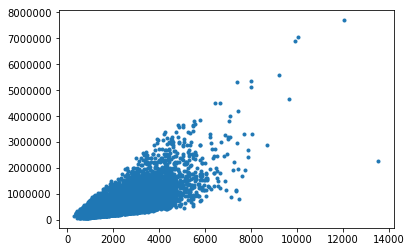

In [127]:
plt.plot(house_df.sqft_living,house_df.price,".")

In [130]:
len(test_df)+len(train_df)

11978

In [131]:
len(house_df)

21613